In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [4]:
df=pd.read_csv('/content/Book1.csv')

In [5]:
print(df.head())

       Date  Closing Volume        Volume  50-Day Moving Average  \
0  01-01-20        6.698408  295689.37230              55.356753   
1  02-01-20       61.452089  847607.11960              56.107148   
2  03-01-20       21.911287  804114.07660              55.246507   
3  04-01-20       47.445713  844474.63390              56.443637   
4  05-01-20       88.814258   36360.73427              57.048413   

   200-Day Moving Average  
0               54.001058  
1               54.034503  
2               54.222753  
3               54.207440  
4               53.992278  


In [6]:
print(df.describe())

       Closing Volume         Volume  50-Day Moving Average  \
count     2500.000000    2500.000000            2500.000000   
mean        49.980192  492856.660992              49.930981   
std         29.214364  290101.899201               4.041506   
min          0.055142     188.259070              18.430147   
25%         24.353805  236626.830875              47.393902   
50%         49.935725  492415.501600              50.284859   
75%         75.816897  740307.703400              52.641623   
max         99.991633  999354.296100              59.637723   

       200-Day Moving Average  
count             2500.000000  
mean                49.902205  
std                  2.124651  
min                 18.430147  
25%                 48.491956  
50%                 50.110520  
75%                 51.184649  
max                 58.024787  


In [7]:
df.dropna(inplace=True)

In [18]:
X = df[['Volume', '50-Day Moving Average']]
y = df['Closing Volume']

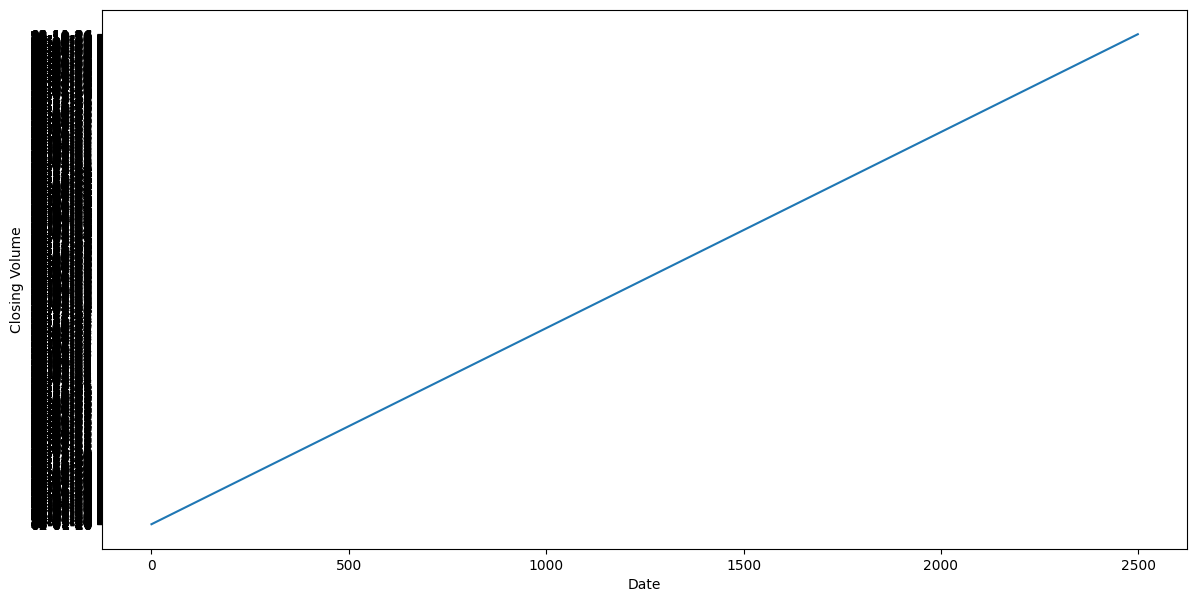

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Date'], label='Closing Volume')
plt.xlabel('Date')
plt.ylabel('Closing Volume')
plt.show()

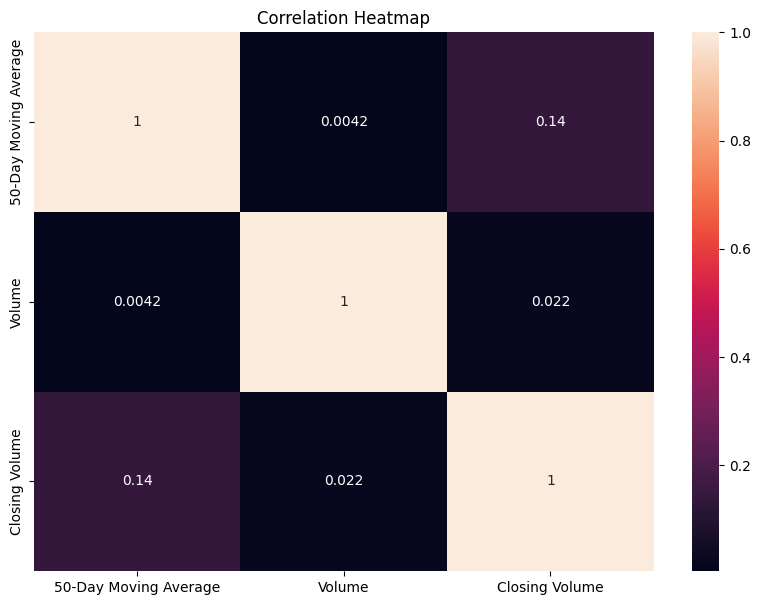

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[['50-Day Moving Average', 'Volume', 'Closing Volume']].corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

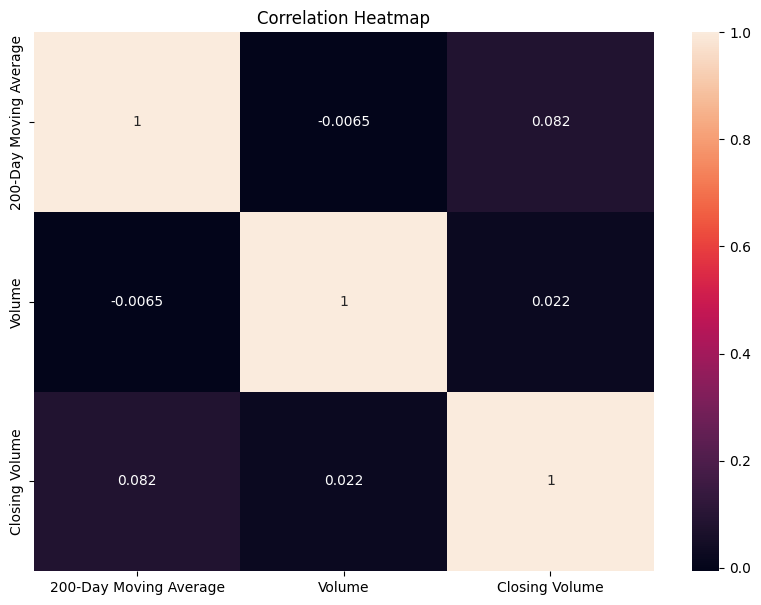

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[['200-Day Moving Average', 'Volume', 'Closing Volume']].corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 810.49


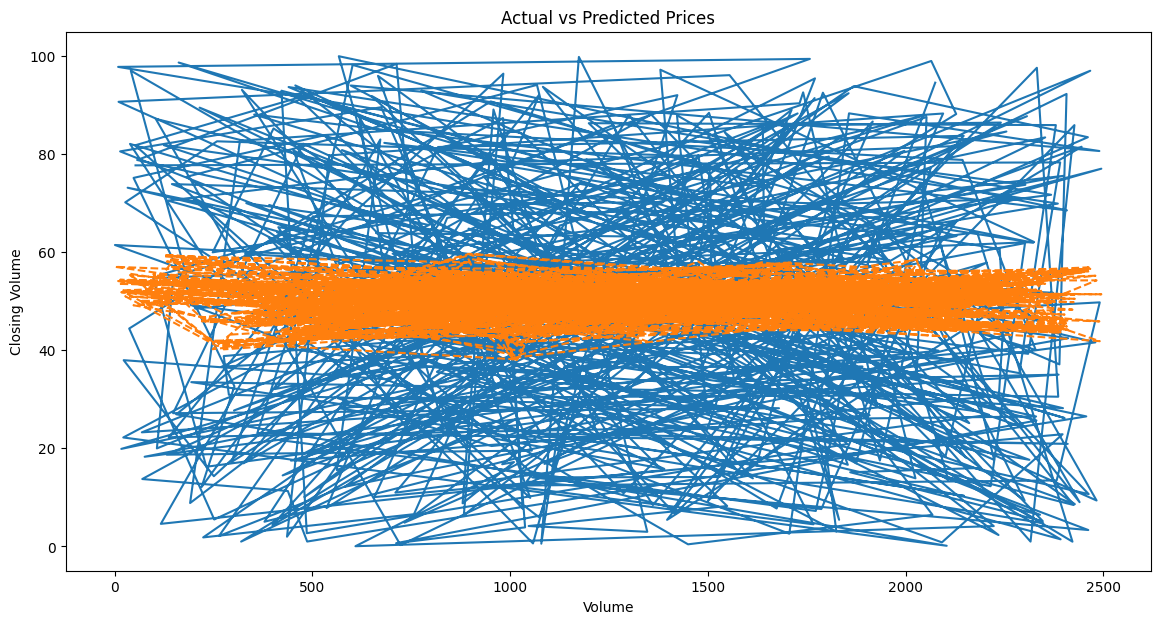

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Volume')
plt.ylabel('Closing Volume')
plt.show()